# Build Your First Neural Network

## Overview

Neural networks are a type of machine learning model that are designed to operate in a similar way to the human brain. While they are not a perfect representation of the human brain, they resemble the structure of how neurons connect to other neurons in the brain. Neural networks are used in a wide variety of applications, including image and speech recognition, natural language processing, and more. In this notebook, we will build a simple from scratch neural network using PyTorch.

**Topics Covered:**
- What is a Neural Network?
  - Build a Neural Network from Scratch
- Understand How Neural Networks Learn
  - Backpropagation
  - Gradient Descent

## What is a Neural Network?

![Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/500px-Artificial_neural_network.svg.png)

Neural networks were created to mimic the way the human brain works. Specifically, they are designed to recognize patterns and learn from them. Neural networks are made up of layers of neurons, which are connected to each other. Each neuron takes in an input, processes it, and passes it on to the next layer of neurons. 

Each neuron in a neural network has a weight and a bias. The weight is a value that determines how much the input value will affect the output of the neuron. The bias is a value that is added to the weighted sum of the inputs to determine the output of the neuron.

Denoting the input to the neuron as $x$, the weight as $w$, and the bias as $b$, the output of the neuron is given by:

$$
\text{output} = wx + b
$$

Notice how the formula is simple? This is the basic building block of a neural network. Each output of a neuron is then passed into another function $sigma$ called the activation function. The activation function is a non-linear function that introduces non-linearity into the output of the neuron. This is important because it allows the neural network to learn complex patterns in the data.

There are many different types of activation functions, but one of the most common is the sigmoid function. The sigmoid function is given by:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

now changing the neuron output formula to include the activation function:

$$
\text{output} = \sigma(wx + b)
$$

Pretty simple right? This formula shows how a single neuron in a neural network works. The power of neural networks comes from the fact that they can have many layers of neurons, each connected to the next. 

If we want to write the function with 2 inputs, and 1 output, we can write it as:

$$
\text{output} = \sigma(w_1x_1 + w_2x_2 + b)
$$

where $w_1$ and $w_2$ are the weights of the inputs $x_1$ and $x_2$ respectively, and $b$ is the bias. Now this funciton seems quite simple, but when we have many neurons and many layers, the function becomes very complex and can learn complex patterns in the data. This has 2 implications:
1. The model can learn very complex patterns in the data
2. The model can become very complex and hard to understand - making it impossible to understand how the model is making predictions

## How Neural Networks Learn

Now that we have gone over how a neural network is just a fancy math function, let's talk about how neural networks learn. Neural networks learn by adjusting the weights and biases of the neurons in the network. This is done through either supervised or unsupervised learning. 

**Supervised Learning:** In supervised learning, the neural network is given a set of inputs $x$ and the correct outputs $y$. The neural network then adjusts the weights and biases of the neurons in the network to minimize the difference between the predicted output $\hat{y}$ and the actual output $y$ with a loss function. Then uses a process called backpropagation to calculate the derivative of the loss function with respect to each weight and bias in the network. The weights and biases are then updated using a process called gradient descent. This is the most common way neural networks learn.

**Unsupervised Learning:** In unsupervised learning, the neural network is given a set of inputs $x$ but not the correct outputs $y$. The neural network then adjusts the weights and biases of the neurons in the network to find patterns in the data. This is less common than supervised learning, but can be useful in some cases such as self driving cars, where the model needs to learn from the environment and ther is no *correct* output.

### Backpropagation

Backpropagation is the process by which a neural network adjusts the weights and biases of the neurons in the network to minimize the difference between the predicted outputs and the correct outputs. This is done by taking the partial derivative of the loss function with respect to each weight and bias in the network. This is done using the chain rule of calculus. This is a complex process, which is why most people use libraries like PyTorch to build neural networks.

### Gradient Descent

## Building a Neural Network

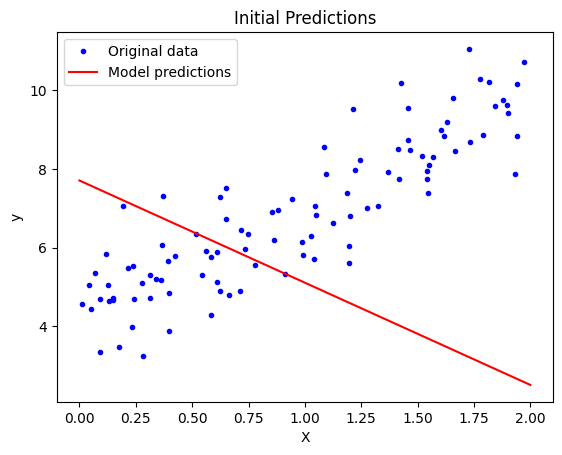

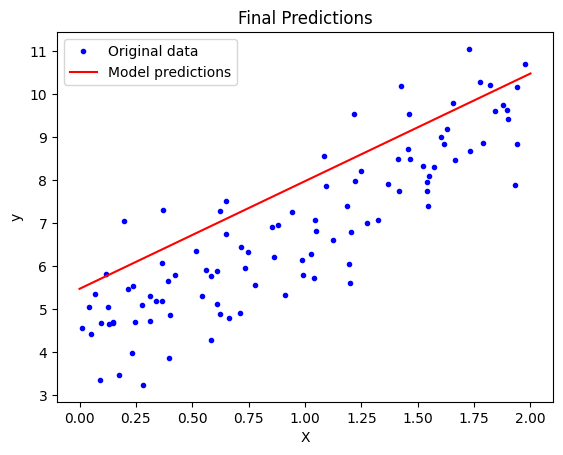

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Define model class
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)  # Weights for input to hidden layer
        self.b1 = np.random.randn(1, hidden_size)  # Bias for hidden layer
        self.w2 = np.random.randn(hidden_size, output_size)  # Weights for hidden to output layer
        self.b2 = np.random.randn(1, output_size)  # Bias for output layer

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1  # Linear combination for hidden layer
        self.a1 = np.maximum(0, self.z1)  # ReLU activation for hidden layer
        self.z2 = np.dot(self.a1, self.w2) + self.b2  # Linear combination for output layer
        return self.z2  # No activation for output layer (regression task)

    def backward(self, X, y, y_pred, learning_rate):
        m = len(y)
        dz2 = (y_pred - y) / m  # Derivative of loss w.r.t output
        dw2 = np.dot(self.a1.T, dz2)  # Derivative of loss w.r.t weights of output layer
        db2 = np.sum(dz2, axis=0, keepdims=True)  # Derivative of loss w.r.t bias of output layer

        da1 = np.dot(dz2, self.w2.T)  # Derivative of loss w.r.t activations of hidden layer
        dz1 = da1 * (self.z1 > 0)  # Derivative of loss w.r.t linear combination of hidden layer
        dw1 = np.dot(X.T, dz1)  # Derivative of loss w.r.t weights of hidden layer
        db1 = np.sum(dz1, axis=0, keepdims=True)  # Derivative of loss w.r.t bias of hidden layer

        # Update weights and biases
        self.w1 -= learning_rate * dw1
        self.b1 -= learning_rate * db1
        self.w2 -= learning_rate * dw2
        self.b2 -= learning_rate * db2

# Model training function
def train_nn(X, y, nn, learning_rate, n_iterations):
    for _ in range(n_iterations):
        y_pred = nn.forward(X)
        nn.backward(X, y, y_pred, learning_rate)

# Plotting predictions
def plot_nn_predictions(nn, title):
    plt.plot(X, y, "b.", label="Original data")
    X_test = np.array([[0], [2]])
    X_test_b = np.c_[np.ones((2, 1)), X_test]
    y_pred = nn.forward(X_test_b)
    plt.plot(X_test, y_pred, "r-", label="Model predictions")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title(title)
    plt.show()

# Initialize and train the neural network
input_size = 2  # One feature and one bias term
hidden_size = 10  # Ten neurons in hidden layer
output_size = 1  # One output neuron

nn = SimpleNN(input_size, hidden_size, output_size)
plot_nn_predictions(nn, "Initial Predictions")

learning_rate = 0.01
n_iterations = 100
train_nn(X_b, y, nn, learning_rate, n_iterations)

plot_nn_predictions(nn, "Final Predictions")


Yay thats a lot of code to write! But don't worry, we will use PyTorch to build our neural network. PyTorch is a popular deep learning library that makes it easy to build and train neural network that does the same thing as above.

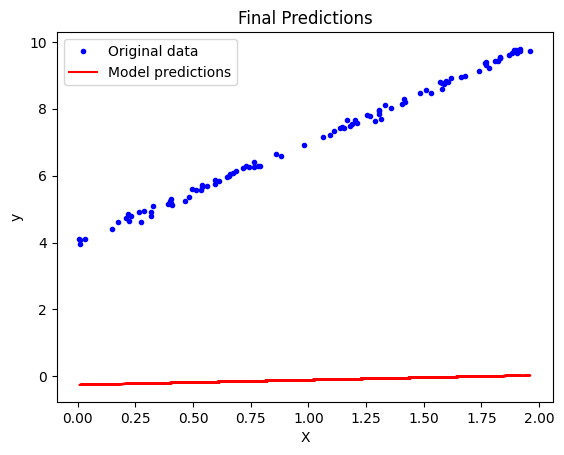

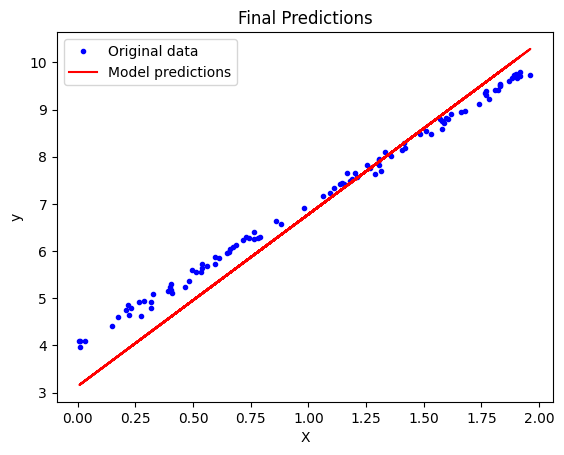

In [37]:
import torch  # Similar to numpy but made for deep learning
import torch.nn as nn  # Neural network module

torch.manual_seed(42)  # Set seed for reproducibility
X = 2 * torch.rand(100, 1)
y = 4 + 3 * X + 0.1 * torch.randn(100, 1)


# Define a simple neural network using PyTorch
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 1)  # Fully connected layer from input to output

    def forward(self, x):
        return self.fc1(x)


# Initialize the neural network
model = SimpleNN()

# Plot initial predictions
plt.plot(X, y, "b.", label="Original data")
plt.plot(X, model(X).detach().numpy(), "r-", label="Model predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Final Predictions")
plt.show()


# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean squared error loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic gradient descent

# Train the neural network
n_iterations = 100


def train_nn(X, y, model, criterion, optimizer, n_iterations):
    for _ in range(n_iterations):
        optimizer.zero_grad()  # Zero out gradients from previous iteration
        y_pred = model(X)  # Forward pass
        loss = criterion(y_pred, y)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights


train_nn(X, y, model, criterion, optimizer, n_iterations)

plt.plot(X, y, "b.", label="Original data")
plt.plot(X, model(X).detach().numpy(), "r-", label="Model predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Final Predictions")
plt.show()


PyTorch makes it easy to build neural networks by providing a set of pre-built layers that you can use to build your network. In this notebook, we will build a simple neural network with one hidden layer using PyTorch.

### Sine Wave Prediction

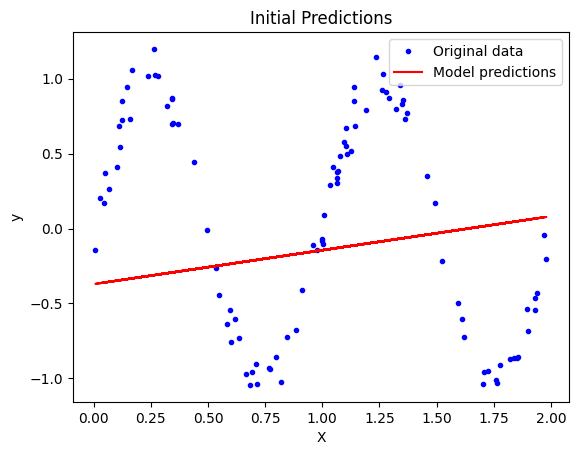

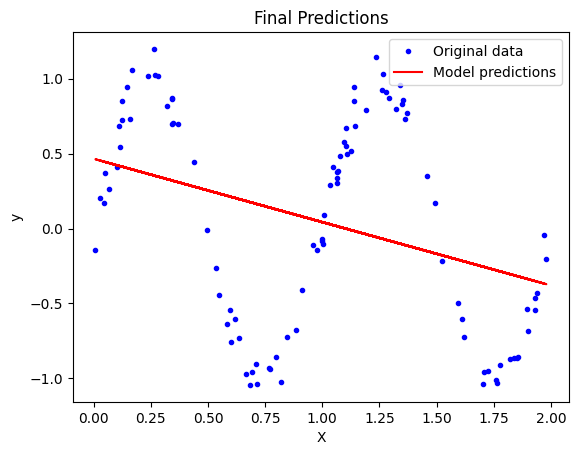

In [43]:
# Generate a synthetic dataset
X = 2 * torch.rand(100, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.randn(100, 1)

model = SimpleNN()

# Plot initial predictions
plt.plot(X, y, "b.", label="Original data")
plt.plot(X, model(X).detach().numpy(), "r-", label="Model predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Initial Predictions")
plt.show()

# Train the neural network
criterion = nn.MSELoss()  # Mean squared error loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic gradient descent

n_iterations = 1000

train_nn(X, y, model, criterion, optimizer, n_iterations)

plt.plot(X, y, "b.", label="Original data")
plt.plot(X, model(X).detach().numpy(), "r-", label="Model predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Final Predictions")
plt.show()


We see that the model is able to fit a line to the data, but the data is not a line, it is a sine wave. This is because the model is a line! We need to make the model more complex to fit the data. We can do this by adding more layers to the model. Let's add a hidden layer to the model and see if it can fit the data better.

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x1 and 2x2)

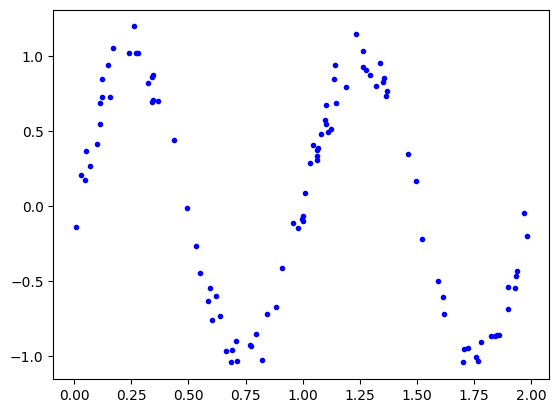

In [52]:
class HiddenNN(nn.Module):
    def __init__(self):
        super(HiddenNN, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Fully connected layer from input to output

    def forward(self, x):
        return self.fc1(x)
    
model = HiddenNN()

# Plot initial predictions
plt.plot(X, y, "b.", label="Original data")
plt.plot(X, model(X).detach().numpy(), "r-", label="Model predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Initial Predictions")
plt.show()

# Train the neural network
criterion = nn.MSELoss()  # Mean squared error loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic gradient descent

n_iterations = 1000

def train_nn(X, y, model, criterion, optimizer, n_iterations):
    for _ in range(n_iterations):
        optimizer.zero_grad()  # Zero out gradients from previous iteration
        y_pred = model(X)  # Forward pass
        loss = criterion(y_pred, y)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
X = torch.cat((X, torch.sin(2 * torch.pi * X)), 1)
train_nn(X, y, model, criterion, optimizer, n_iterations)

plt.plot(X[:, 0], y, "b.", label="Original data")
plt.plot(X[:, 0], model(X).detach().numpy(), "r-", label="Model predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Final Predictions")
plt.show()


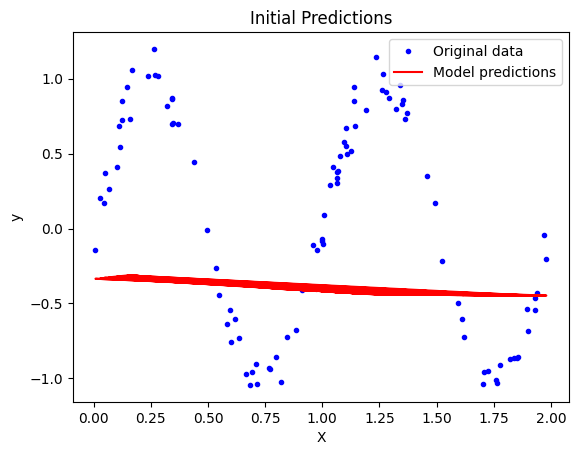

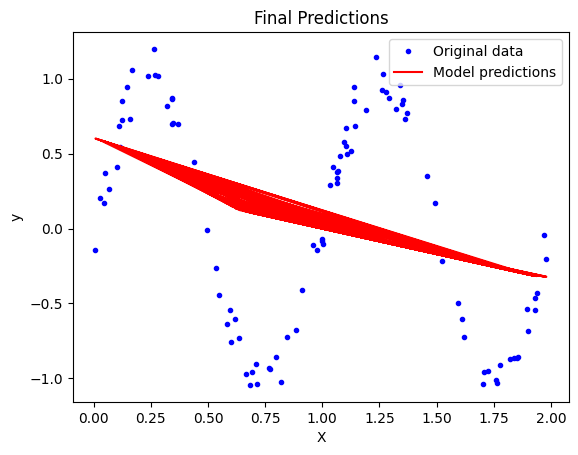

In [50]:
model = HiddenNN(hidden_size=8)

# Plot initial predictions
plt.plot(X, y, "b.", label="Original data")
plt.plot(X, model(X).detach().numpy(), "r-", label="Model predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Initial Predictions")
plt.show()

# Train the neural network
criterion = nn.MSELoss()  # Mean squared error loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic gradient descent

n_iterations = 1000

train_nn(X, y, model, criterion, optimizer, n_iterations)

plt.plot(X, y, "b.", label="Original data")
plt.plot(X, model(X).detach().numpy(), "r-", label="Model predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Final Predictions")
plt.show()
